## Logistic regression

In the first part of this exercise, we'll build a logistic regression model to predict whether a patient will going to get a cardiac arrest.  Suppose that you are a cardiologist and you want to determine each patient's chance of getting a heart attack based on the body measurments. You have historical data from previous patients that you can use as a training set for logistic regression.  To accomplish this, we're going to build a classification model that estimates the probability of admission based on the exam scores. Use the `heart.csv` dataset that comes with the exercises.

Let's start by examining the data.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Data/heart.csv")


## Explore the data a bit.
### List:

1.   First few rows
2.   Basic statistic
3.   .info()
4.   Column names

Questions:

1. What is the dependent variable (column name)?
* **It is called "target"and is a dummy variable (heart attack = 1, no heart attack = 0)**
2. What are the independent variables?

* **All ohter variables are potential independent variables:**
* **'age'**
* **'sex' (dummy variable, male vs female)**
* **'cp'= chest pain type (categorical)**
* **trestbps' = Resting blood pressure of the patient**
* **'chol' = Serum cholesterol level of the patient**
* **'fbs' =  Fasting blood sugar level greater than 120 mg/dl (dummy variable, 1 = true, 0 = false)**
* **'restecg' =  Resting electrocardiographic results (categorical)**
* **'thalach' = Maximum heart rate achieved by the patient**
* **'exang' =  Exercise-induced angina (dummy)**
* **'oldpeak' = ST depression induced by exercise relative to rest**
* **'slope' = slope of the peak exercise ST segment (categorical)**
* **'ca' = Number of major vessels colored by fluoroscopy (categorical)**
* **'thal' = Thalassemia type (categorical)**

3. Should we normalize the data?
* **yes because large outliers would otherwise dominate the prediction. also it solves the issue of scales. Different scales make it difficult to interpret the coefficients and larger scales would domintate the predicition contribution similarly to the outliers.)**

4. What are the column data-types?
* **numeric data (some are catgeorical). int64 for all variables except "oldpeak" it is float64**

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Exploratory Data Analysis (EDA)

Create some simple plots to check out the data!

1.   Plot the pairwise scatter-plot between each column
2.   Plot the distribution of the values of the dependent variable
3.   Plot the pairwise correlation heatmap of each column.

Answer questions:

1.  What are the assumptions of the logistic regression model?
* **Binary dependent variable**
* **Linear relationship between independent variable and log-odds of dependent vairbale**
* **no large outliers**
* **no multicollineratiy (highly correlated independent variables)**
* **independent observations**
+ **compared to linear regression does not need: linear relationship between dependent & independent variables, homooscedasticity (constant variance), normally distributed residuals**

2.  Can we accept the basic assumptions of the logistic regression model?
* **Yes we can.**
* **Binary dependent variable: yes, target can have value 0 or 1**
* **independent observations: assumed from data collection**
* **No strong correlation between features: looking at the heatmap it suggests that the independent variables correlate not or only very slightly with each other**
* **The sample size is sufficient**
* **There are no outliers or missing values in the data**


3.  Judging by the scatter-plots, do you see any patterns in the data?
* **No it does not really give a lot of information of the realtionshps between the variables. It does not appear that anz of the variables have a strong correlation. Supporting the heatmap of only slight correlation coefficients.**

4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
* **Yes, the indepentend variable has correlations with all the independent variables with a correlation coefficient between approximately 0.4 and -0.5. Therefore, negative as well as positive relationships exist.**

5.  Are there correlations among independent variables?
* **Yes, it appears that the target variable is slightly positively correlated with cp, thalach, and slope and slightly negatively correlated with exang, oldpeak, ca, and thal.**

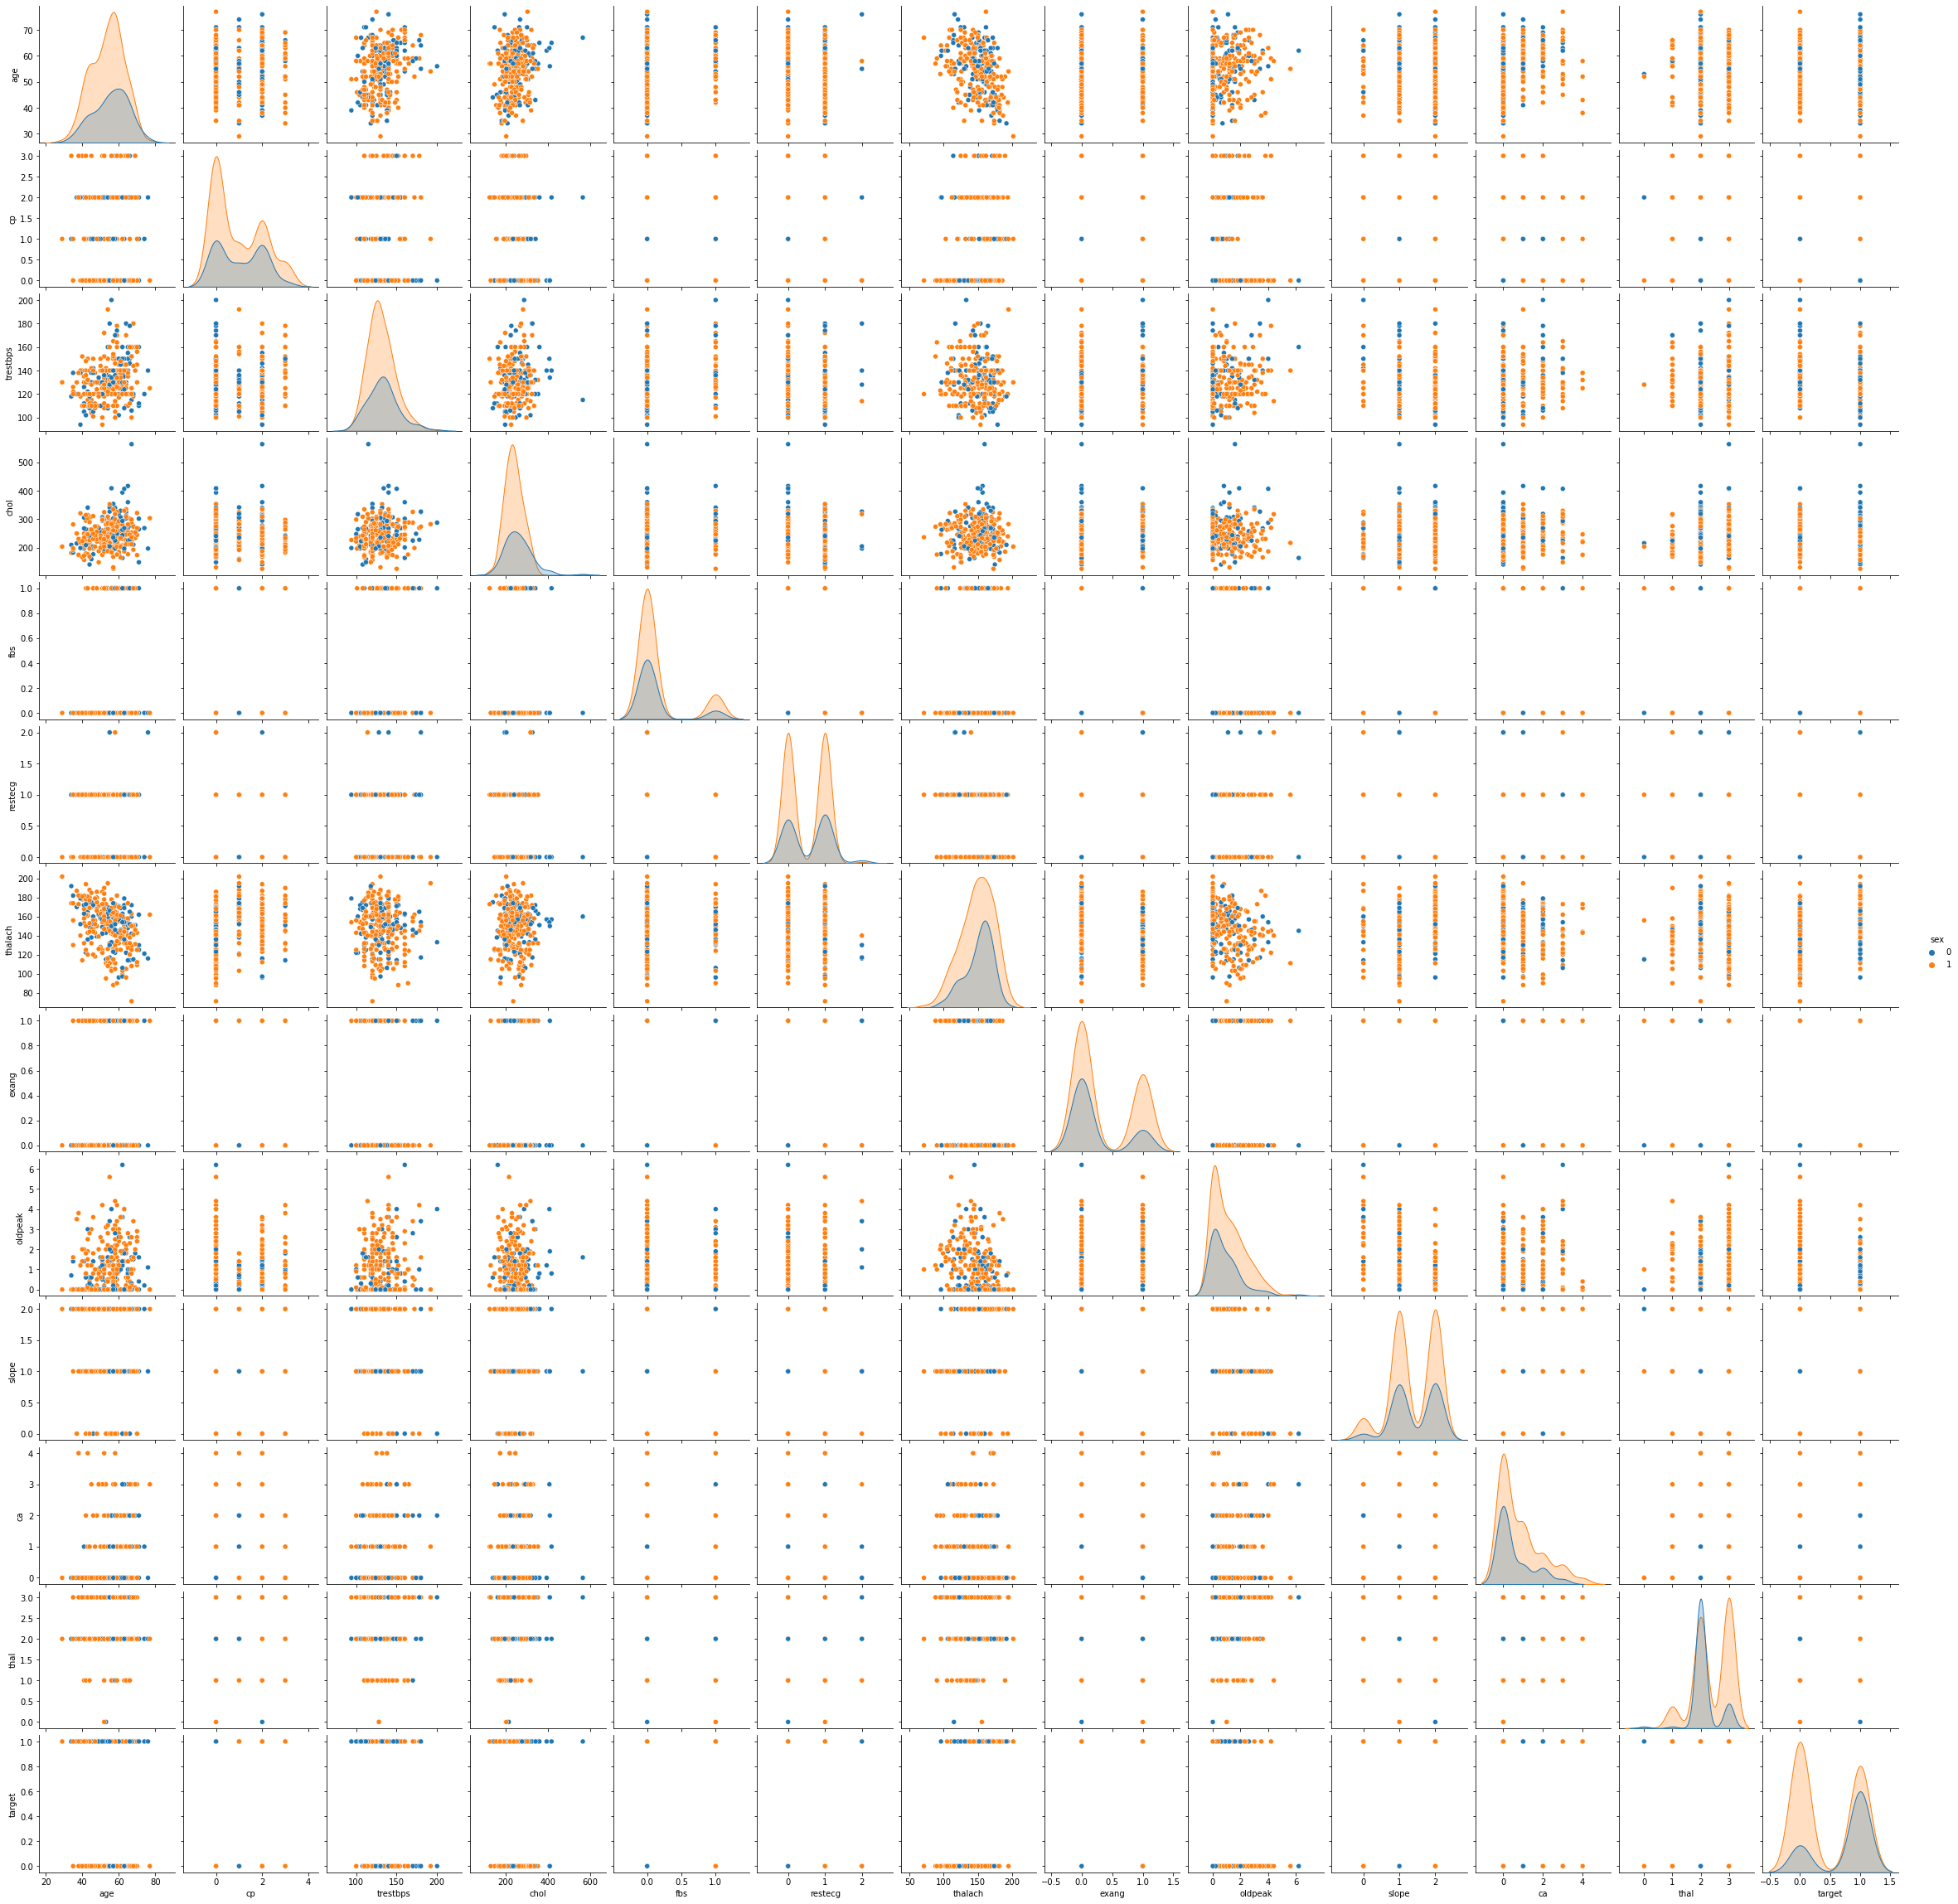

In [9]:
# 1. Pairwise scatterplot
sns.pairplot(df, hue = "sex")

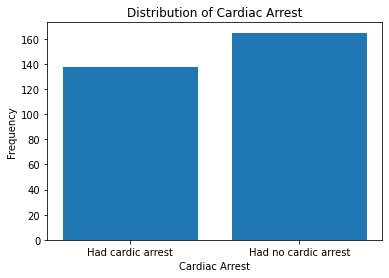

In [10]:
# 2. Distribution of values
target_counts = df["target"].value_counts()

plt.bar(target_counts.index, target_counts.values)

plt.xlabel("Cardiac Arrest")
plt.ylabel("Frequency")
plt.title("Distribution of Cardiac Arrest")

plt.xticks(target_counts.index, ["Had no cardic arrest", "Had cardic arrest"])

plt.show()

<AxesSubplot:>

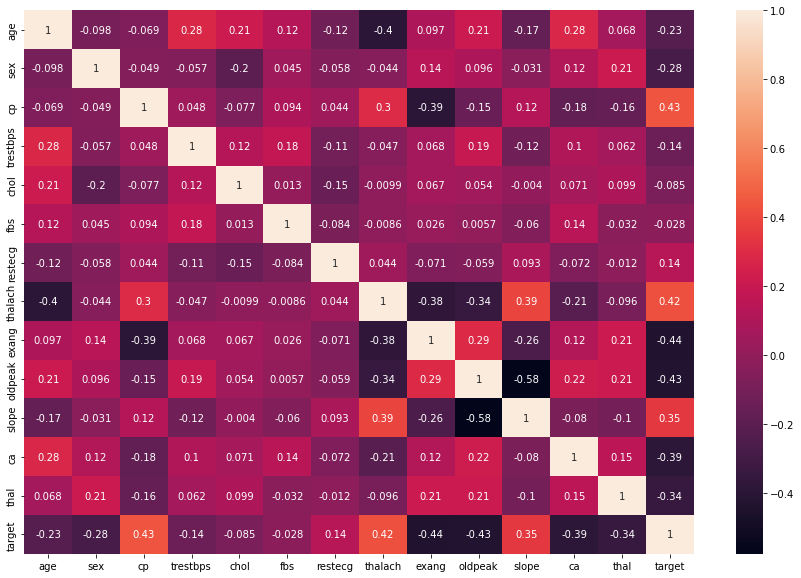

In [14]:
# correlation matrix
plt.figure(figsize=(15,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)

# Logistic Regression
First we need to create a sigmoid function.

Task:
1.  Implement the function

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Make sure the function is correctly implemented.

Task:
1.  Plot the function.

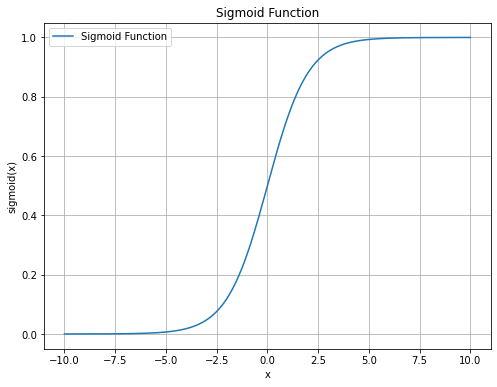

In [17]:
# Generate values for x
x = np.linspace(-10, 10, 400)
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.legend()
plt.grid(True)
plt.show()

Task:
1. Write the cost function to evaluate a solution.

In [24]:
def cost(X,y, theta):
    m = len(y)  # Number of training examples
    epsilon = 1e-15  # Small value to avoid log(0)
    
    # predicting y
    y_pred = sigmoid(np.dot(X,theta))

    # Calculate the cost
    cost = (-1/m) * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
    
    return cost

Task:
1. Separate the data to `X` and `y` arrays.
2. Separate the training set and evaluation set.

In [25]:
y = df['target'].values
X = df.drop("target", axis = 1).values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
# Scale the features for better convergence
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Task:
1. Check the shape of our arrays to make sure everything looks good.

In [28]:
print("y_train:", y_train.shape, "X_train:", X_train.shape)
print("y_test:", y_test.shape, "X_test:", X_test.shape)

# Seems correct: y has 303 values where each is 0 or 1 and X holds 303 lists which each includes information of the 13 independent variables

y_train: (242,) X_train: (242, 13)
y_test: (61,) X_test: (61, 13)


Task:
1. Compute the cost for our initial solution (eyeball the initial value, e.g. zero or some random value).

In [29]:
# Generating random theta values
theta = np.random.randn(X_train.shape[1])

cost_initial = cost(X_train, y_train, theta)
print("Cost of initial solution: ", cost_initial)

Cost of initial solution:  0.9597598851199944


Task:
  Implement a function to compute the gradient (parameter updates) given our training data, labels, and model parameters.

In [34]:
def gradient(X, y, theta, alpha, iterations):
    
    m = len(y)
    n = X.shape[1]
    history = []
    
    for i in range(iterations):
        y_pred = sigmoid(np.dot(X,theta)) # predict y
        theta = theta - (alpha / m) * np.dot(X.T, (y_pred - y)) # update weights & bias
        history.append(cost(X, y, theta)) # get the development for the cost
        

    return theta, history

In [35]:
theta1, history1 = gradient(X_train, y_train, theta, 0.1, 20)
print("Theta", theta1, "Cost for each iteration", history1)

Theta [-1.871455   -0.85087546 -0.28246491  0.83687987  0.6791915   0.00252339
  0.81536711  0.14047732 -0.78037783  0.28364341 -0.25278042 -1.48310669
 -1.17816478] Cost for each iteration [0.9445870720195392, 0.9300056046584496, 0.9159824114747913, 0.9024868025389787, 0.8894903337871698, 0.8769666595043849, 0.8648913780011447, 0.8532418747549217, 0.8419971666092855, 0.8311377500025812, 0.8206454556555538, 0.8105033116796817, 0.8006954166554349, 0.7912068238488562, 0.7820234373641233, 0.7731319206586021, 0.7645196174721175, 0.7561744848547739, 0.7480850376327142, 0.7402403033505088]


Task:
  1. Use the scikit-learn library (or write your own optimizer using the gradient function) to optimize the classifier parameters

In [37]:
from sklearn.linear_model import LogisticRegression

# Step 1: Use scikit-learn to optimize the classifier parameters
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
# Get coefficients learned by the model
optimized_theta = model.coef_[0]
print(optimized_theta)

[-0.07554609 -0.86419891  0.79641426 -0.1929562  -0.24758964 -0.13386133
  0.09180366  0.50500584 -0.47863218 -0.64516548  0.13456573 -0.884006
 -0.45962413]


Task:
1. Calculate the cost for the optimized parameters

In [40]:
# Step 2: Calculate the cost for the optimized parameters
optimized_cost = cost(X_train, y_train, optimized_theta)
print("Cost with Optimized Parameters:", optimized_cost)

Cost with Optimized Parameters: 0.3500245495916493


Task:
1. Write a function that will output predictions for a dataset X using our learned parameters.
2. Use this function to score and print the training accuracy of our classifier.

In [42]:
# 1. Function outputing predictions
def predict(X, theta):
    y_pred = np.round(sigmoid(np.dot(X, theta))) # Convert probabilities to binary class predictions
    return y_pred

In [44]:
# 2.
y_train_pred = predict(X_train, optimized_theta)

def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

training_accuracy = accuracy(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.8388429752066116


In [45]:
print("Training predictions", y_train_pred)

Training predictions [1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 1.]


In [46]:
# For test set
y_test_pred = predict(X_test, optimized_theta)
test_accuracy = accuracy(y_test, y_test_pred)
print("Training Accuracy:", test_accuracy)

Training Accuracy: 0.8360655737704918


In [47]:
print("Test predictions", y_test_pred)

Test predictions [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
